<a href="https://colab.research.google.com/github/AnitaTasnim/GNN_attack_model/blob/main/02_ricci%2Bmetagrad_citeseer_185_2__________0_58_for__(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# Tutorial: GraphRicciCurvature

This is a walk through tutorial of GraphRicciCurvature, and a demonstration of how to apply Ricci curvature for various tasks such as community detection. Please make sure you have the latest package to run this tutorial.

- Try this tutorial with interactive jupyter notebooks:

    - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/saibalmars/GraphRicciCurvature/master?filepath=notebooks%2Ftutorial.ipynb)
    
    - [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saibalmars/GraphRicciCurvature/blob/master/M/tutorial.ipynb) (Faster, but Google account required.)



## Preparation:
### Load library

##Import Library

In [ ]:
import torch

if torch.cuda.is_available():
    # Code to run when CUDA is available (for GPU)
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    # Code to run when CUDA is not available (for cuda)
    device = torch.device("cuda")
    print("CUDA is not available. Using cuda.")

# Now you can use `device` to specify whether you want to use GPU or cuda for your code.


CUDA is available. Using GPU.


In [ ]:
#https://deeprobust.readthedocs.io/en/latest/notes/installation.html

In [ ]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5835, done.
remote: Counting objects: 100% (1547/1547), done.
remote: Compressing objects: 100% (645/645), done.
remote: Total 5835 (delta 968), reused 1461 (delta 894), pack-reused 4288
Receiving objects: 100% (5835/5835), 12.09 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.
/content/DeepRobust
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/p

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# colab setting
!pip install GraphRicciCurvature
!pip install scikit-learn

# import sys
# sys.path.append("../")


import networkx as nx
import numpy as np
import math

# matplotlib setting
%matplotlib inline
import matplotlib.pyplot as plt

# to print logs in jupyter notebook
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

# load GraphRicciCuravture package
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci


# load python-louvain for modularity computation
import community.community_louvain as community_louvain

# for ARI computation
from sklearn import preprocessing, metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 70.0 MB/s eta 0:00:00


In [ ]:
import GraphRicciCurvature
print(GraphRicciCurvature.__version__)


0.5.3.1


In [ ]:
import matplotlib.pyplot as plt

##using deeprobust load CITESEER dataset

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Install torch-geometric
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00


In [ ]:

from deeprobust.graph.data import Dataset, Dpr2Pyg, Pyg2Dpr
data = Dataset(root='/tmp/', name='citeseer') # load clean graph
pyg_data = Dpr2Pyg(data) # convert dpr to pyg
print(pyg_data)
print(pyg_data[0])


Loading citeseer dataset...
Done!
Selecting 1 largest connected components
Dpr2Pyg()
Data(x=[2110, 3703], edge_index=[2, 7336], y=[2110], train_mask=[2110], val_mask=[2110], test_mask=[2110])


/content/DeepRobust/deeprobust/graph/data/pyg_dataset.py:48: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index = torch.LongTensor(dpr_data.adj.nonzero())
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [ ]:
data =  pyg_data[0]

In [ ]:
data

Data(x=[2110, 3703], edge_index=[2, 7336], y=[2110], train_mask=[2110], val_mask=[2110], test_mask=[2110])

In [ ]:
7336*(5/100)

366.8

In [ ]:
370/2

185.0

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
G = to_networkx(data, to_undirected=True)


In [ ]:


import copy

In [ ]:
data_original = copy.deepcopy(data)

In [ ]:
print(G)

Graph with 2110 nodes and 3668 edges


In [ ]:
G = to_networkx(data, to_undirected=True)

In [ ]:
# Find connected components (subgraphs)
connected_components = list(nx.connected_components(G))

# Print the number of connected components
print("Number of connected components:", len(connected_components))

Number of connected components: 1


In [ ]:
!pip install networkx==2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556003 sha256=cc1b3d29e811703aeaf779a1988e72c1b67dce7293e747416e3a18d9f5dfb06c
  Stored in directory: /root/.cache/pip/wheels/a2/61/d8/147fad6a09bfd85366862c93d34556b9e155ce7690f8c0aa13
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeprobust 0.2.7 requires tensorboardX>=2.0, which is not installed.
deeprobust 0.2.7 requires texttable>=1.6.2, which is not installed.
deeprobust 0.2.7 requires gensim<4.0,>=3.8, but you have gensim 4.3.2 which is incompatible.
deeprobust 0.2.7 requi

In [ ]:
!pip install cython numpy "scipy>=1.0" "networkx>=2.0" cvxpy pot packaging "networkit>=6.1" python-louvain


#meta

In [ ]:
import torch
print(torch.__version__)
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html


2.1.0+cu121
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 97.0 MB/s eta 0:00:00


##utils

In [ ]:
import numpy as np
import scipy.sparse as sp
import torch
from sklearn.model_selection import train_test_split
import torch.sparse as ts
import torch.nn.functional as F
import warnings

def encode_onehot(labels):
    """Convert label to onehot format.

    Parameters
    ----------
    labels : numpy.array
        node labels

    Returns
    -------
    numpy.array
        onehot labels
    """
    eye = np.eye(labels.max() + 1)
    onehot_mx = eye[labels]
    return onehot_mx

def tensor2onehot(labels):
    """Convert label tensor to label onehot tensor.

    Parameters
    ----------
    labels : torch.LongTensor
        node labels

    Returns
    -------
    torch.LongTensor
        onehot labels tensor

    """

    eye = torch.eye(labels.max() + 1)
    onehot_mx = eye[labels]
    return onehot_mx.to(labels.device)

def preprocess(adj, features, labels, preprocess_adj=False, preprocess_feature=False, sparse=False, device='cuda'):
    """Convert adj, features, labels from array or sparse matrix to
    torch Tensor, and normalize the input data.

    Parameters
    ----------
    adj : scipy.sparse.csr_matrix
        the adjacency matrix.
    features : scipy.sparse.csr_matrix
        node features
    labels : numpy.array
        node labels
    preprocess_adj : bool
        whether to normalize the adjacency matrix
    preprocess_feature : bool
        whether to normalize the feature matrix
    sparse : bool
       whether to return sparse tensor
    device : str
        'cuda' or 'cuda'
    """

    if preprocess_adj:
        adj = normalize_adj(adj)

    if preprocess_feature:
        features = normalize_feature(features)

    labels = torch.LongTensor(labels)
    if sparse:
        adj = sparse_mx_to_torch_sparse_tensor(adj)
        features = sparse_mx_to_torch_sparse_tensor(features)
    else:
        if sp.issparse(features):
            features = torch.FloatTensor(np.array(features.todense()))
        else:
            features = torch.FloatTensor(features)
        adj = torch.FloatTensor(adj.todense())
    return adj.to(device), features.to(device), labels.to(device)

def to_tensor(adj, features, labels=None, device='cuda'):
    """Convert adj, features, labels from array or sparse matrix to
    torch Tensor.

    Parameters
    ----------
    adj : scipy.sparse.csr_matrix
        the adjacency matrix.
    features : scipy.sparse.csr_matrix
        node features
    labels : numpy.array
        node labels
    device : str
        'cuda' or 'cuda'
    """
    if sp.issparse(adj):
        adj = sparse_mx_to_torch_sparse_tensor(adj)
    else:
        adj = torch.FloatTensor(adj)
    if sp.issparse(features):
        features = sparse_mx_to_torch_sparse_tensor(features)
    else:
        features = torch.FloatTensor(np.array(features))

    if labels is None:
        return adj.to(device), features.to(device)
    else:
        labels = torch.LongTensor(labels)
        return adj.to(device), features.to(device), labels.to(device)

def normalize_feature(mx):
    """Row-normalize sparse matrix or dense matrix

    Parameters
    ----------
    mx : scipy.sparse.csr_matrix or numpy.array
        matrix to be normalized

    Returns
    -------
    scipy.sprase.lil_matrix
        normalized matrix
    """
    if type(mx) is not sp.lil.lil_matrix:
        try:
            mx = mx.tolil()
        except AttributeError:
            pass
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def normalize_adj(mx):
    """Normalize sparse adjacency matrix,
    A' = (D + I)^-1/2 * ( A + I ) * (D + I)^-1/2
    Row-normalize sparse matrix

    Parameters
    ----------
    mx : scipy.sparse.csr_matrix
        matrix to be normalized

    Returns
    -------
    scipy.sprase.lil_matrix
        normalized matrix
    """

    # TODO: maybe using coo format would be better?
    if type(mx) is not sp.lil.lil_matrix:
        mx = mx.tolil()
    if mx[0, 0] == 0 :
        mx = mx + sp.eye(mx.shape[0])
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1/2).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    mx = mx.dot(r_mat_inv)
    return mx

def normalize_sparse_tensor(adj, fill_value=1):
    """Normalize sparse tensor. Need to import torch_scatter
    """
    edge_index = adj._indices()
    edge_weight = adj._values()
    num_nodes= adj.size(0)
    edge_index, edge_weight = add_self_loops(
	edge_index, edge_weight, fill_value, num_nodes)

    row, col = edge_index
    from torch_scatter import scatter_add
    deg = scatter_add(edge_weight, row, dim=0, dim_size=num_nodes)
    deg_inv_sqrt = deg.pow(-0.5)
    deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

    values = deg_inv_sqrt[row] * edge_weight * deg_inv_sqrt[col]

    shape = adj.shape
    return torch.sparse.FloatTensor(edge_index, values, shape)

def add_self_loops(edge_index, edge_weight=None, fill_value=1, num_nodes=None):
    # num_nodes = maybe_num_nodes(edge_index, num_nodes)

    loop_index = torch.arange(0, num_nodes, dtype=torch.long,
                              device=edge_index.device)
    loop_index = loop_index.unsqueeze(0).repeat(2, 1)

    if edge_weight is not None:
        assert edge_weight.numel() == edge_index.size(1)
        loop_weight = edge_weight.new_full((num_nodes, ), fill_value)
        edge_weight = torch.cat([edge_weight, loop_weight], dim=0)

    edge_index = torch.cat([edge_index, loop_index], dim=1)

    return edge_index, edge_weight

def normalize_adj_tensor(adj, sparse=False):
    """Normalize adjacency tensor matrix.
    """
    device = adj.device
    if sparse:
        # warnings.warn('If you find the training process is too slow, you can uncomment line 207 in deeprobust/graph/utils.py. Note that you need to install torch_sparse')
        # TODO if this is too slow, uncomment the following code,
        # but you need to install torch_scatter
        # return normalize_sparse_tensor(adj)
        adj = to_scipy(adj)
        mx = normalize_adj(adj)
        return sparse_mx_to_torch_sparse_tensor(mx).to(device)
    else:
        mx = adj + torch.eye(adj.shape[0]).to(device)
        rowsum = mx.sum(1)
        r_inv = rowsum.pow(-1/2).flatten()
        r_inv[torch.isinf(r_inv)] = 0.
        r_mat_inv = torch.diag(r_inv)
        mx = r_mat_inv @ mx
        mx = mx @ r_mat_inv
    return mx

def degree_normalize_adj(mx):
    """Row-normalize sparse matrix"""
    mx = mx.tolil()
    if mx[0, 0] == 0 :
        mx = mx + sp.eye(mx.shape[0])
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    # mx = mx.dot(r_mat_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def degree_normalize_sparse_tensor(adj, fill_value=1):
    """degree_normalize_sparse_tensor.
    """
    edge_index = adj._indices()
    edge_weight = adj._values()
    num_nodes= adj.size(0)

    edge_index, edge_weight = add_self_loops(
	edge_index, edge_weight, fill_value, num_nodes)

    row, col = edge_index
    from torch_scatter import scatter_add
    deg = scatter_add(edge_weight, row, dim=0, dim_size=num_nodes)
    deg_inv_sqrt = deg.pow(-1)
    deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0

    values = deg_inv_sqrt[row] * edge_weight
    shape = adj.shape
    return torch.sparse.FloatTensor(edge_index, values, shape)

def degree_normalize_adj_tensor(adj, sparse=True):
    """degree_normalize_adj_tensor.
    """

    device = adj.device
    if sparse:
        # return  degree_normalize_sparse_tensor(adj)
        adj = to_scipy(adj)
        mx = degree_normalize_adj(adj)
        return sparse_mx_to_torch_sparse_tensor(mx).to(device)
    else:
        mx = adj + torch.eye(adj.shape[0]).to(device)
        rowsum = mx.sum(1)
        r_inv = rowsum.pow(-1).flatten()
        r_inv[torch.isinf(r_inv)] = 0.
        r_mat_inv = torch.diag(r_inv)
        mx = r_mat_inv @ mx
    return mx

def accuracy(output, labels):
    """Return accuracy of output compared to labels.

    Parameters
    ----------
    output : torch.Tensor
        output from model
    labels : torch.Tensor or numpy.array
        node labels

    Returns
    -------
    float
        accuracy
    """
    if not hasattr(labels, '__len__'):
        labels = [labels]
    if type(labels) is not torch.Tensor:
        labels = torch.LongTensor(labels)
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

def loss_acc(output, labels, targets, avg_loss=True):
    if type(labels) is not torch.Tensor:
        labels = torch.LongTensor(labels)
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()[targets]
    loss = F.nll_loss(output[targets], labels[targets], reduction='mean' if avg_loss else 'none')

    if avg_loss:
        return loss, correct.sum() / len(targets)
    return loss, correct
    # correct = correct.sum()
    # return loss, correct / len(labels)

def get_perf(output, labels, mask, verbose=True):
    """evalute performance for test masked data"""
    loss = F.nll_loss(output[mask], labels[mask])
    acc = accuracy(output[mask], labels[mask])
    if verbose:
        print("loss= {:.4f}".format(loss.item()),
              "accuracy= {:.4f}".format(acc.item()))
    return loss.item(), acc.item()


def classification_margin(output, true_label):
    """Calculate classification margin for outputs.
    `probs_true_label - probs_best_second_class`

    Parameters
    ----------
    output: torch.Tensor
        output vector (1 dimension)
    true_label: int
        true label for this node

    Returns
    -------
    list
        classification margin for this node
    """

    probs = torch.exp(output)
    probs_true_label = probs[true_label].clone()
    probs[true_label] = 0
    probs_best_second_class = probs[probs.argmax()]
    return (probs_true_label - probs_best_second_class).item()

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    sparserow=torch.LongTensor(sparse_mx.row).unsqueeze(1)
    sparsecol=torch.LongTensor(sparse_mx.col).unsqueeze(1)
    sparseconcat=torch.cat((sparserow, sparsecol),1)
    sparsedata=torch.FloatTensor(sparse_mx.data)
    return torch.sparse.FloatTensor(sparseconcat.t(),sparsedata,torch.Size(sparse_mx.shape))

	# slower version....
    # sparse_mx = sparse_mx.tocoo().astype(np.float32)
    # indices = torch.from_numpy(
    #     np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    # values = torch.from_numpy(sparse_mx.data)
    # shape = torch.Size(sparse_mx.shape)
    # return torch.sparse.FloatTensor(indices, values, shape)



def to_scipy(tensor):
    """Convert a dense/sparse tensor to scipy matrix"""
    if is_sparse_tensor(tensor):
        values = tensor._values()
        indices = tensor._indices()
        return sp.csr_matrix((values.cuda().numpy(), indices.cuda().numpy()), shape=tensor.shape)
    else:
        indices = tensor.nonzero().t()
        values = tensor[indices[0], indices[1]]
        return sp.csr_matrix((values.cuda().numpy(), indices.cuda().numpy()), shape=tensor.shape)

def is_sparse_tensor(tensor):
    """Check if a tensor is sparse tensor.

    Parameters
    ----------
    tensor : torch.Tensor
        given tensor

    Returns
    -------
    bool
        whether a tensor is sparse tensor
    """
    # if hasattr(tensor, 'nnz'):
    if tensor.layout == torch.sparse_coo:
        return True
    else:
        return False

def get_train_val_test(nnodes, val_size=0.1, test_size=0.8, stratify=None, seed=None):
    """This setting follows nettack/mettack, where we split the nodes
    into 10% training, 10% validation and 80% testing data

    Parameters
    ----------
    nnodes : int
        number of nodes in total
    val_size : float
        size of validation set
    test_size : float
        size of test set
    stratify :
        data is expected to split in a stratified fashion. So stratify should be labels.
    seed : int or None
        random seed

    Returns
    -------
    idx_train :
        node training indices
    idx_val :
        node validation indices
    idx_test :
        node test indices
    """

    assert stratify is not None, 'stratify cannot be None!'

    if seed is not None:
        np.random.seed(seed)

    idx = np.arange(nnodes)
    train_size = 1 - val_size - test_size
    idx_train_and_val, idx_test = train_test_split(idx,
                                                   random_state=None,
                                                   train_size=train_size + val_size,
                                                   test_size=test_size,
                                                   stratify=stratify)

    if stratify is not None:
        stratify = stratify[idx_train_and_val]

    idx_train, idx_val = train_test_split(idx_train_and_val,
                                          random_state=None,
                                          train_size=(train_size / (train_size + val_size)),
                                          test_size=(val_size / (train_size + val_size)),
                                          stratify=stratify)

    return idx_train, idx_val, idx_test

def get_train_test(nnodes, test_size=0.8, stratify=None, seed=None):
    """This function returns training and test set without validation.
    It can be used for settings of different label rates.

    Parameters
    ----------
    nnodes : int
        number of nodes in total
    test_size : float
        size of test set
    stratify :
        data is expected to split in a stratified fashion. So stratify should be labels.
    seed : int or None
        random seed

    Returns
    -------
    idx_train :
        node training indices
    idx_test :
        node test indices
    """
    assert stratify is not None, 'stratify cannot be None!'

    if seed is not None:
        np.random.seed(seed)

    idx = np.arange(nnodes)
    train_size = 1 - test_size
    idx_train, idx_test = train_test_split(idx, random_state=None,
                                                train_size=train_size,
                                                test_size=test_size,
                                                stratify=stratify)

    return idx_train, idx_test

def get_train_val_test_gcn(labels, seed=None):
    """This setting follows gcn, where we randomly sample 20 instances for each class
    as training data, 500 instances as validation data, 1000 instances as test data.
    Note here we are not using fixed splits. When random seed changes, the splits
    will also change.

    Parameters
    ----------
    labels : numpy.array
        node labels
    seed : int or None
        random seed

    Returns
    -------
    idx_train :
        node training indices
    idx_val :
        node validation indices
    idx_test :
        node test indices
    """
    if seed is not None:
        np.random.seed(seed)

    idx = np.arange(len(labels))
    nclass = labels.max() + 1
    idx_train = []
    idx_unlabeled = []
    for i in range(nclass):
        labels_i = idx[labels==i]
        labels_i = np.random.permutation(labels_i)
        idx_train = np.hstack((idx_train, labels_i[: 20])).astype(np.int)
        idx_unlabeled = np.hstack((idx_unlabeled, labels_i[20: ])).astype(np.int)

    idx_unlabeled = np.random.permutation(idx_unlabeled)
    idx_val = idx_unlabeled[: 500]
    idx_test = idx_unlabeled[500: 1500]
    return idx_train, idx_val, idx_test

def get_train_test_labelrate(labels, label_rate):
    """Get train test according to given label rate.
    """
    nclass = labels.max() + 1
    train_size = int(round(len(labels) * label_rate / nclass))
    print("=== train_size = %s ===" % train_size)
    idx_train, idx_val, idx_test = get_splits_each_class(labels, train_size=train_size)
    return idx_train, idx_test

def get_splits_each_class(labels, train_size):
    """We randomly sample n instances for class, where n = train_size.
    """
    idx = np.arange(len(labels))
    nclass = labels.max() + 1
    idx_train = []
    idx_val = []
    idx_test = []
    for i in range(nclass):
        labels_i = idx[labels==i]
        labels_i = np.random.permutation(labels_i)
        idx_train = np.hstack((idx_train, labels_i[: train_size])).astype(np.int)
        idx_val = np.hstack((idx_val, labels_i[train_size: 2*train_size])).astype(np.int)
        idx_test = np.hstack((idx_test, labels_i[2*train_size: ])).astype(np.int)

    return np.random.permutation(idx_train), np.random.permutation(idx_val), \
           np.random.permutation(idx_test)


def unravel_index(index, array_shape):
    rows = torch.div(index, array_shape[1], rounding_mode='trunc')
    cols = index % array_shape[1]
    return rows, cols


def get_degree_squence(adj):
    try:
        return adj.sum(0)
    except:
        return ts.sum(adj, dim=1).to_dense()

def likelihood_ratio_filter(node_pairs, modified_adjacency, original_adjacency, d_min, threshold=0.004, undirected=True):
    """
    Filter the input node pairs based on the likelihood ratio test proposed by Zügner et al. 2018, see
    https://dl.acm.org/citation.cfm?id=3220078. In essence, for each node pair return 1 if adding/removing the edge
    between the two nodes does not violate the unnoticeability constraint, and return 0 otherwise. Assumes unweighted
    and undirected graphs.
    """

    N = int(modified_adjacency.shape[0])
    # original_degree_sequence = get_degree_squence(original_adjacency)
    # current_degree_sequence = get_degree_squence(modified_adjacency)
    original_degree_sequence = original_adjacency.sum(0)
    current_degree_sequence = modified_adjacency.sum(0)

    concat_degree_sequence = torch.cat((current_degree_sequence, original_degree_sequence))

    # Compute the log likelihood values of the original, modified, and combined degree sequences.
    ll_orig, alpha_orig, n_orig, sum_log_degrees_original = degree_sequence_log_likelihood(original_degree_sequence, d_min)
    ll_current, alpha_current, n_current, sum_log_degrees_current = degree_sequence_log_likelihood(current_degree_sequence, d_min)

    ll_comb, alpha_comb, n_comb, sum_log_degrees_combined = degree_sequence_log_likelihood(concat_degree_sequence, d_min)

    # Compute the log likelihood ratio
    current_ratio = -2 * ll_comb + 2 * (ll_orig + ll_current)

    # Compute new log likelihood values that would arise if we add/remove the edges corresponding to each node pair.
    new_lls, new_alphas, new_ns, new_sum_log_degrees = updated_log_likelihood_for_edge_changes(node_pairs,
                                                                                               modified_adjacency, d_min)

    # Combination of the original degree distribution with the distributions corresponding to each node pair.
    n_combined = n_orig + new_ns
    new_sum_log_degrees_combined = sum_log_degrees_original + new_sum_log_degrees
    alpha_combined = compute_alpha(n_combined, new_sum_log_degrees_combined, d_min)
    new_ll_combined = compute_log_likelihood(n_combined, alpha_combined, new_sum_log_degrees_combined, d_min)
    new_ratios = -2 * new_ll_combined + 2 * (new_lls + ll_orig)

    # Allowed edges are only those for which the resulting likelihood ratio measure is < than the threshold
    allowed_edges = new_ratios < threshold

    if allowed_edges.is_.cuda():
        filtered_edges = node_pairs[allowed_edges.cuda.numpy().astype(np.bool)]
    else:
        filtered_edges = node_pairs[allowed_edges.numpy().astype(np.bool)]

    allowed_mask = torch.zeros(modified_adjacency.shape)
    allowed_mask[filtered_edges.T] = 1
    if undirected:
        allowed_mask += allowed_mask.t()
    return allowed_mask, current_ratio


def degree_sequence_log_likelihood(degree_sequence, d_min):
    """
    Compute the (maximum) log likelihood of the Powerlaw distribution fit on a degree distribution.
    """

    # Determine which degrees are to be considered, i.e. >= d_min.
    D_G = degree_sequence[(degree_sequence >= d_min.item())]
    try:
        sum_log_degrees = torch.log(D_G).sum()
    except:
        sum_log_degrees = np.log(D_G).sum()
    n = len(D_G)

    alpha = compute_alpha(n, sum_log_degrees, d_min)
    ll = compute_log_likelihood(n, alpha, sum_log_degrees, d_min)
    return ll, alpha, n, sum_log_degrees

def updated_log_likelihood_for_edge_changes(node_pairs, adjacency_matrix, d_min):
    """ Adopted from https://github.com/danielzuegner/nettack
    """
    # For each node pair find out whether there is an edge or not in the input adjacency matrix.

    edge_entries_before = adjacency_matrix[node_pairs.T]
    degree_sequence = adjacency_matrix.sum(1)
    D_G = degree_sequence[degree_sequence >= d_min.item()]
    sum_log_degrees = torch.log(D_G).sum()
    n = len(D_G)
    deltas = -2 * edge_entries_before + 1
    d_edges_before = degree_sequence[node_pairs]

    d_edges_after = degree_sequence[node_pairs] + deltas[:, None]

    # Sum the log of the degrees after the potential changes which are >= d_min
    sum_log_degrees_after, new_n = update_sum_log_degrees(sum_log_degrees, n, d_edges_before, d_edges_after, d_min)
    # Updated estimates of the Powerlaw exponents
    new_alpha = compute_alpha(new_n, sum_log_degrees_after, d_min)
    # Updated log likelihood values for the Powerlaw distributions
    new_ll = compute_log_likelihood(new_n, new_alpha, sum_log_degrees_after, d_min)
    return new_ll, new_alpha, new_n, sum_log_degrees_after


def update_sum_log_degrees(sum_log_degrees_before, n_old, d_old, d_new, d_min):
    # Find out whether the degrees before and after the change are above the threshold d_min.
    old_in_range = d_old >= d_min
    new_in_range = d_new >= d_min
    d_old_in_range = d_old * old_in_range.float()
    d_new_in_range = d_new * new_in_range.float()

    # Update the sum by subtracting the old values and then adding the updated logs of the degrees.
    sum_log_degrees_after = sum_log_degrees_before - (torch.log(torch.clamp(d_old_in_range, min=1))).sum(1) \
                                 + (torch.log(torch.clamp(d_new_in_range, min=1))).sum(1)

    # Update the number of degrees >= d_min

    new_n = n_old - (old_in_range!=0).sum(1) + (new_in_range!=0).sum(1)
    new_n = new_n.float()
    return sum_log_degrees_after, new_n

def compute_alpha(n, sum_log_degrees, d_min):
    try:
        alpha =  1 + n / (sum_log_degrees - n * torch.log(d_min - 0.5))
    except:
        alpha =  1 + n / (sum_log_degrees - n * np.log(d_min - 0.5))
    return alpha

def compute_log_likelihood(n, alpha, sum_log_degrees, d_min):
    # Log likelihood under alpha
    try:
        ll = n * torch.log(alpha) + n * alpha * torch.log(d_min) + (alpha + 1) * sum_log_degrees
    except:
        ll = n * np.log(alpha) + n * alpha * np.log(d_min) + (alpha + 1) * sum_log_degrees

    return ll

def ravel_multiple_indices(ixs, shape, reverse=False):
    """
    "Flattens" multiple 2D input indices into indices on the flattened matrix, similar to np.ravel_multi_index.
    Does the same as ravel_index but for multiple indices at once.
    Parameters
    ----------
    ixs: array of ints shape (n, 2)
        The array of n indices that will be flattened.

    shape: list or tuple of ints of length 2
        The shape of the corresponding matrix.

    Returns
    -------
    array of n ints between 0 and shape[0]*shape[1]-1
        The indices on the flattened matrix corresponding to the 2D input indices.

    """
    if reverse:
        return ixs[:, 1] * shape[1] + ixs[:, 0]

    return ixs[:, 0] * shape[1] + ixs[:, 1]

def visualize(your_var):
    """visualize computation graph"""
    from graphviz import Digraph
    import torch
    from torch.autograd import Variable
    from torchviz import make_dot
    make_dot(your_var).view()

def reshape_mx(mx, shape):
    indices = mx.nonzero()
    return sp.csr_matrix((mx.data, (indices[0], indices[1])), shape=shape)

def add_mask(data, dataset):
    """data: ogb-arxiv pyg data format"""
    # for arxiv
    split_idx = dataset.get_idx_split()
    train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
    n = data.x.shape[0]
    data.train_mask = index_to_mask(train_idx, n)
    data.val_mask = index_to_mask(valid_idx, n)
    data.test_mask = index_to_mask(test_idx, n)
    data.y = data.y.squeeze()
    # data.edge_index = to_undirected(data.edge_index, data.num_nodes)

def index_to_mask(index, size):
    mask = torch.zeros((size, ), dtype=torch.bool)
    mask[index] = 1
    return mask

def add_feature_noise(data, noise_ratio, seed):
    np.random.seed(seed)
    n, d = data.x.shape
    # noise = torch.normal(mean=torch.zeros(int(noise_ratio*n), d), std=1)
    noise = torch.FloatTensor(np.random.normal(0, 1, size=(int(noise_ratio*n), d))).to(data.x.device)
    indices = np.arange(n)
    indices = np.random.permutation(indices)[: int(noise_ratio*n)]
    delta_feat = torch.zeros_like(data.x)
    delta_feat[indices] = noise - data.x[indices]
    data.x[indices] = noise
    mask = np.zeros(n)
    mask[indices] = 1
    mask = torch.tensor(mask).bool().to(data.x.device)
    return delta_feat, mask

def add_feature_noise_test(data, noise_ratio, seed):
    np.random.seed(seed)
    n, d = data.x.shape
    indices = np.arange(n)
    test_nodes = indices[data.test_mask ]
    selected = np.random.permutation(test_nodes)[: int(noise_ratio*len(test_nodes))]
    noise = torch.FloatTensor(np.random.normal(0, 1, size=(int(noise_ratio*len(test_nodes)), d)))
    noise = noise.to(data.x.device)

    delta_feat = torch.zeros_like(data.x)
    delta_feat[selected] = noise - data.x[selected]
    data.x[selected] = noise
    # mask = np.zeros(len(test_nodes))
    mask = np.zeros(n)
    mask[selected] = 1
    mask = torch.tensor(mask).bool().to(data.x.device)
    return delta_feat, mask

# def check_path(file_path):
#     if not osp.exists(file_path):
#         os.system(f'mkdir -p {file_path}')

##meta2

In [ ]:
import os.path as osp

import numpy as np
import scipy.sparse as sp
import torch
from torch.nn.modules.module import Module


class BaseAttack(Module):
    """Abstract base class for target attack classes.

    Parameters
    ----------
    model :
        model to attack
    nnodes : int
        number of nodes in the input graph
    attack_structure : bool
        whether to attack graph structure
    attack_features : bool
        whether to attack node features
    device: str
        'cuda' or 'cuda'

    """



    def __init__(self, model, nnodes, attack_structure=True, attack_features=False, device='cuda'):
        super(BaseAttack, self).__init__()

        self.surrogate = model
        self.nnodes = nnodes
        self.attack_structure = attack_structure
        self.attack_features = attack_features
        self.device = 'cuda'
        self.modified_adj = None
        self.modified_features = None
        if model is not None:
            self.nclass = model.nclass
            self.nfeat = model.nfeat
            self.hidden_sizes = model.hidden_sizes


    def attack(self, ori_adj, n_perturbations, **kwargs):
        """Generate attacks on the input graph.

        Parameters
        ----------
        ori_adj : scipy.sparse.csr_matrix
            Original (unperturbed) adjacency matrix.
        n_perturbations : int
            Number of edge removals/additions.

        Returns
        -------
        None.

        """
        pass

    def check_adj(self, adj):
        """Check if the modified adjacency is symmetric and unweighted.
        """
        assert np.abs(adj - adj.T).sum() == 0, "Input graph is not symmetric"
        assert adj.tocsr().max() == 1, "Max value should be 1!"
        assert adj.tocsr().min() == 0, "Min value should be 0!"

    def check_adj_tensor(self, adj):
        """Check if the modified adjacency is symmetric, unweighted, all-zero diagonal.
        """
        assert torch.abs(adj - adj.t()).sum() == 0, "Input graph is not symmetric"
        assert adj.max() == 1, "Max value should be 1!"
        assert adj.min() == 0, "Min value should be 0!"
        diag = adj.diag()
        assert diag.max() == 0, "Diagonal should be 0!"
        assert diag.min() == 0, "Diagonal should be 0!"


    def save_adj(self, root=r'/content/sample_data/root', name='mod_adj'):
        """Save attacked adjacency matrix.

        Parameters
        ----------
        root :
            root directory where the variable should be saved
        name : str
            saved file name

        Returns
        -------
        None.

        """
        assert self.modified_adj is not None, \
                'modified_adj is None! Please perturb the graph first.'
        name = name + '.npz'
        modified_adj = self.modified_adj

        if type(modified_adj) is torch.Tensor:
            sparse_adj = to_scipy(modified_adj)
            sp.save_npz(osp.join(root, name), sparse_adj)
        else:
            sp.save_npz(osp.join('/content/sample_data/root', name), modified_adj)

    def save_features(self, root=r'/content/sample_data/root', name='mod_features'):
        """Save attacked node feature matrix.

        Parameters
        ----------
        root :
            root directory where the variable should be saved
        name : str
            saved file name

        Returns
        -------
        None.

        """

        assert self.modified_features is not None, \
                'modified_features is None! Please perturb the graph first.'
        name = name + '.npz'
        modified_features = self.modified_features

        if type(modified_features) is torch.Tensor:
            sparse_features = utils.to_scipy(modified_features)
            sp.save_npz(osp.join(root, name), sparse_features)
        else:
            sp.save_npz(osp.join(root, name), modified_features)

##base meta

In [ ]:
import math
import numpy as np
import scipy.sparse as sp
import torch
from torch import optim
from torch.nn import functional as F
from torch.nn.parameter import Parameter
from tqdm import tqdm

class BaseMeta(BaseAttack):
    """Abstract base class for meta attack. Adversarial Attacks on Graph Neural
    Networks via Meta Learning, ICLR 2019,
    https://openreview.net/pdf?id=Bylnx209YX

    Parameters
    ----------
    model :
        model to attack. Default `None`.
    nnodes : int
        number of nodes in the input graph
    lambda_ : float
        lambda_ is used to weight the two objectives in Eq. (10) in the paper.
    feature_shape : tuple
        shape of the input node features
    attack_structure : bool
        whether to attack graph structure
    attack_features : bool
        whether to attack node features
    undirected : bool
        whether the graph is undirected
    device: str
        'cuda' or 'cuda'

    """

class BaseMeta(BaseAttack):
    def __init__(self, model=None, nnodes=None, feature_shape=None, lambda_=0.5, attack_structure=True, attack_features=False, undirected=True, device='cuda'):
        super().__init__(model, nnodes, attack_structure, attack_features, device)
        self.lambda_ = lambda_
        assert attack_features or attack_structure, 'attack_features or attack_structure cannot be both False'

        self.modified_adj = None
        self.modified_features = None

        if attack_structure:
             self.undirected = undirected
             self.adj_changes = Parameter(torch.FloatTensor(nnodes, nnodes))
             self.adj_changes.data.fill_(0)

        if attack_features:
             assert feature_shape is not None, 'Please give feature_shape='
             self.feature_changes = Parameter(torch.FloatTensor(feature_shape))
             self.feature_changes.data.fill_(0)

        self.with_relu = model.with_relu



    def attack(self, adj, labels, n_perturbations):
        pass


    def get_modified_adj(self, ori_adj, specified_edges):
        adj_changes_square = self.adj_changes - torch.diag(torch.diag(self.adj_changes, 0))
        # ind = np.diag_indices(self.adj_changes.shape[0]) # this line seems useless
        if self.undirected:
            adj_changes_square = adj_changes_square + torch.transpose(adj_changes_square, 1, 0)
        adj_changes_square = torch.clamp(adj_changes_square, -1, 1)
        modified_adj = adj_changes_square + ori_adj

        # Apply modifications based on specified_edges
        for edge in specified_edges:
            row_idx, col_idx = edge
            modified_adj[row_idx][col_idx] = ori_adj[row_idx][col_idx]  # Replace with your modification logic

        return modified_adj


    def get_modified_features(self, ori_features):
        return ori_features + self.feature_changes

    def filter_potential_singletons(self, modified_adj):
        """
        Computes a mask for entries potentially leading to singleton nodes, i.e. one of the two nodes corresponding to
        the entry have degree 1 and there is an edge between the two nodes.
        """

        degrees = modified_adj.sum(0)
        degree_one = (degrees == 1)
        resh = degree_one.repeat(modified_adj.shape[0], 1).float()
        l_and = resh * modified_adj
        if self.undirected:
            l_and = l_and + l_and.t()
        flat_mask = 1 - l_and
        return flat_mask

    def self_training_label(self, labels, idx_train):
    # Move labels tensor to GPU
        labels = labels.to('cuda')

    # Assuming output is obtained from some previous computation
        output = self.surrogate.output

    # Get the indices where labels are known
        labels_self_training = output.argmax(1)

    # Update the labels with the known training labels
        labels_self_training[idx_train] = labels[idx_train]

        return labels_self_training




    def log_likelihood_constraint(self, modified_adj, ori_adj, ll_cutoff):
        """
        Computes a mask for entries that, if the edge corresponding to the entry is added/removed, would lead to the
        log likelihood constraint to be violated.

        Note that different data type (float, double) can effect the final results.
        """
        t_d_min = torch.tensor(2.0).to(self.device)
        if self.undirected:
            t_possible_edges = np.array(np.triu(np.ones((self.nnodes, self.nnodes)), k=1).nonzero()).T
        else:
            t_possible_edges = np.array((np.ones((self.nnodes, self.nnodes)) - np.eye(self.nnodes)).nonzero()).T
        allowed_mask, current_ratio = likelihood_ratio_filter(t_possible_edges,
                                                                    modified_adj,
                                                                    ori_adj, t_d_min,
                                                                    ll_cutoff, undirected=self.undirected)
        return allowed_mask, current_ratio

    def get_adj_score(self, adj_grad, modified_adj, ori_adj, ll_constraint, ll_cutoff):
        adj_meta_grad = adj_grad * (-2 * modified_adj + 1)
        # Make sure that the minimum entry is 0.
        adj_meta_grad = adj_meta_grad - adj_meta_grad.min()
        # Filter self-loops
        adj_meta_grad = adj_meta_grad - torch.diag(torch.diag(adj_meta_grad, 0))
        # # Set entries to 0 that could lead to singleton nodes.
        singleton_mask = self.filter_potential_singletons(modified_adj)
        adj_meta_grad = adj_meta_grad *  singleton_mask

        if ll_constraint:
            allowed_mask, self.ll_ratio = self.log_likelihood_constraint(modified_adj, ori_adj, ll_cutoff)
            allowed_mask = allowed_mask.to(self.device)
            adj_meta_grad = adj_meta_grad * allowed_mask
        return adj_meta_grad

    def get_feature_score(self, feature_grad, modified_features):
        feature_meta_grad = feature_grad * (-2 * modified_features + 1)
        feature_meta_grad -= feature_meta_grad.min()
        return feature_meta_grad

##get meta grad

In [ ]:
##get meta grad

import math
import numpy as np
import scipy.sparse as sp
import torch
from torch.nn import Parameter
from torch.nn import functional as F
from tqdm import tqdm

class Metattack(BaseMeta):

    def __init__(self, model, nnodes, attack_structure=True, attack_features=False, undirected=True, device='cuda', with_bias=False, lambda_=0.5, train_iters=100, lr=0.1, momentum=0.9):
        super(Metattack, self).__init__(model, nnodes, attack_structure=attack_structure, attack_features=attack_features, undirected=undirected, device=device)
        self.momentum = momentum
        self.lr = lr
        self.train_iters = train_iters
        self.with_bias = with_bias
        self.sparse_features = False  # Set to False if not working with sparse features

        self.weights = []
        self.biases = []
        self.w_velocities = []
        self.b_velocities = []

        self.hidden_sizes = self.surrogate.hidden_sizes
        self.nfeat = self.surrogate.nfeat
        self.nclass = self.surrogate.nclass

        previous_size = self.nfeat
        for ix, nhid in enumerate(self.hidden_sizes):
            weight = Parameter(torch.FloatTensor(previous_size, nhid).to(device))
            w_velocity = torch.zeros(weight.shape).to(device)
            self.weights.append(weight)
            self.w_velocities.append(w_velocity)

            if self.with_bias:
                bias = Parameter(torch.FloatTensor(nhid).to(device))
                b_velocity = torch.zeros(bias.shape).to(device)
                self.biases.append(bias)
                self.b_velocities.append(b_velocity)

            previous_size = nhid

        output_weight = Parameter(torch.FloatTensor(previous_size, self.nclass).to(device))
        output_w_velocity = torch.zeros(output_weight.shape).to(device)
        self.weights.append(output_weight)
        self.w_velocities.append(output_w_velocity)

        if self.with_bias:
            output_bias = Parameter(torch.FloatTensor(self.nclass).to(device))
            output_b_velocity = torch.zeros(output_bias.shape).to(device)
            self.biases.append(output_bias)
            self.b_velocities.append(output_b_velocity)

        self._initialize()

    def _initialize(self):
        for w, v in zip(self.weights, self.w_velocities):
            stdv = 1. / math.sqrt(w.size(1))
            w.data.uniform_(-stdv, stdv)
            v.data.fill_(0)

        if self.with_bias:
            for b, v in zip(self.biases, self.b_velocities):
                stdv = 1. / math.sqrt(b.size(0))
                b.data.uniform_(-stdv, stdv)
                v.data.fill_(0)

    def inner_train(self, features, adj_norm, idx_train, idx_unlabeled, labels):
        self._initialize()

        for ix in range(len(self.hidden_sizes) + 1):
            self.weights[ix] = self.weights[ix].detach()
            self.weights[ix].requires_grad = True
            self.w_velocities[ix] = self.w_velocities[ix].detach()
            self.w_velocities[ix].requires_grad = True

            if self.with_bias:
                self.biases[ix] = self.biases[ix].detach()
                self.biases[ix].requires_grad = True
                self.b_velocities[ix] = self.b_velocities[ix].detach()
                self.b_velocities[ix].requires_grad = True

        for j in range(self.train_iters):
            hidden = features
            for ix, w in enumerate(self.weights):
                b = self.biases[ix] if self.with_bias else 0
                if isinstance(adj_norm, torch.sparse.FloatTensor):
                    hidden = adj_norm @ torch.spmm(hidden, w) + b
                else:
                    hidden = adj_norm @ hidden @ w + b

                if self.with_relu and ix != len(self.weights) - 1:
                    hidden = F.relu(hidden)

            output = F.log_softmax(hidden, dim=1)
            loss_labeled = F.nll_loss(output[idx_train], labels[idx_train])

            weight_grads = torch.autograd.grad(loss_labeled, self.weights, create_graph=True)
            self.w_velocities = [self.momentum * v + g for v, g in zip(self.w_velocities, weight_grads)]
            if self.with_bias:
                bias_grads = torch.autograd.grad(loss_labeled, self.biases, create_graph=True)
                self.b_velocities = [self.momentum * v + g for v, g in zip(self.b_velocities, bias_grads)]

            self.weights = [w - self.lr * v for w, v in zip(self.weights, self.w_velocities)]
            if self.with_bias:
                self.biases = [b - self.lr * v for b, v in zip(self.biases, self.b_velocities)]




    def compute_edge_gradients(self, features, adj, idx_train, labels):
        device = 'cuda' # Ensure using the class-defined device for all tensors
        features, adj, labels = features.to(device), adj.to(device), labels.to(device)
        adj.requires_grad_(True)  # Enable gradient computation for adj

        # Perform the forward pass similarly to get_meta_grad
        hidden = features
        for ix, w in enumerate(self.weights):
            w = w.to(device)  # Ensure weights are on the correct device
            b = self.biases[ix].to(device) if self.with_bias else 0
            hidden = torch.matmul(adj, hidden) @ w + b
            if self.with_relu and ix != len(self.weights) - 1:
                hidden = F.relu(hidden)

        output = F.log_softmax(hidden, dim=1)
        loss = F.nll_loss(output[idx_train], labels[idx_train])

        # Compute gradients with respect to adj
        adj_grad = torch.autograd.grad(loss, adj, create_graph=True)[0]

        # Convert gradients to edge scores
        edge_scores = self.get_adj_score(adj_grad, adj)

        # Map edge scores to (node1, node2) format
        edge_score_dict = {}
        for i in range(adj.shape[0]):
            for j in range(adj.shape[1]):
                if adj[i, j].item() > 0:  # Assuming an edge exists if adj[i, j] > 0
                    edge_score_dict[(i, j)] = edge_scores[i, j].item()

        return edge_score_dict





    def get_adj_score(self, adj_grad, ori_adj):
        adj_meta_scores = torch.abs(adj_grad)
        return adj_meta_scores


#run this

In [ ]:
data

Data(x=[2110, 3703], edge_index=[2, 7336], y=[2110], train_mask=[2110], val_mask=[2110], test_mask=[2110])

###cheack meta

In [ ]:
original_edge_index = data.edge_index

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix

# Assuming original_edge_index is a PyTorch tensor
# You need to move it to cuda before converting it to a NumPy array
original_edge_index_cuda = original_edge_index

# Number of nodes can be inferred from the maximum index in your edge index.
# You might need to adjust this if there are nodes without edges.
num_nodes = max(original_edge_index_cuda.flatten()) + 1

# Source and target nodes
row = original_edge_index_cuda[0, :]  # Source nodes
col = original_edge_index_cuda[1, :]  # Target nodes

# Create a COO-format sparse matrix from the edge indices.
# We use ones to fill the data, implying an edge exists.
data12 = np.ones(original_edge_index_cuda.shape[1])
adj_matrix = coo_matrix((data12, (row, col)), shape=(num_nodes, num_nodes))

# To print the matrix in the desired format:
print(adj_matrix)


  (0, 253)	1.0
  (0, 285)	1.0
  (0, 850)	1.0
  (0, 894)	1.0
  (0, 1063)	1.0
  (0, 1222)	1.0
  (0, 1436)	1.0
  (0, 1437)	1.0
  (0, 1638)	1.0
  (0, 1639)	1.0
  (0, 2012)	1.0
  (1, 393)	1.0
  (1, 1523)	1.0
  (1, 1733)	1.0
  (2, 3)	1.0
  (2, 1357)	1.0
  (2, 1366)	1.0
  (3, 2)	1.0
  (3, 1874)	1.0
  (4, 488)	1.0
  (4, 712)	1.0
  (4, 734)	1.0
  (4, 982)	1.0
  (4, 1785)	1.0
  (4, 1862)	1.0
  :	:
  (2103, 2102)	1.0
  (2104, 245)	1.0
  (2104, 2105)	1.0
  (2105, 245)	1.0
  (2105, 663)	1.0
  (2105, 2104)	1.0
  (2106, 976)	1.0
  (2107, 1694)	1.0
  (2107, 1904)	1.0
  (2107, 1944)	1.0
  (2107, 2006)	1.0
  (2107, 2075)	1.0
  (2108, 560)	1.0
  (2108, 725)	1.0
  (2108, 1311)	1.0
  (2108, 1388)	1.0
  (2108, 1437)	1.0
  (2108, 1515)	1.0
  (2108, 1534)	1.0
  (2109, 113)	1.0
  (2109, 669)	1.0
  (2109, 1027)	1.0
  (2109, 1350)	1.0
  (2109, 1858)	1.0
  (2109, 1927)	1.0


In [ ]:
adj=adj_matrix
ori_adj = adj

In [ ]:

features, labels = data.x, data.y
idx_train, idx_val, idx_test = data.train_mask,data.val_mask, data.test_mask
idx_unlabeled = np.union1d(idx_val, idx_test)
idx_unlabeled = np.union1d(idx_val, idx_test)
# Setup Surrogate model
ori_features = features

In [ ]:
# Extract the node numbers corresponding to the indices where train_mask is True
train_nodes = torch.nonzero(data.train_mask, as_tuple=True)[0].numpy()

# Extract the node numbers corresponding to the indices where val_mask is True
val_nodes = torch.nonzero(data.val_mask, as_tuple=True)[0].numpy()

# Extract the node numbers corresponding to the indices where test_mask is True
test_nodes = torch.nonzero(data.test_mask, as_tuple=True)[0].numpy()


In [ ]:
# Initialize the train_mask tensor
train_mask =  train_nodes
test_mask =  test_nodes
val_mask =  val_nodes
idx_train=train_mask
idx_test=test_mask
idx_val=val_mask

In [ ]:
import torch

# Convert the sparse matrix to a PyTorch tensor
adj_tensor = torch.FloatTensor(adj.toarray())

# Move the tensor from GPU to cuda
adj_cuda = adj_tensor#.cuda()




import numpy as np

from deeprobust.graph.defense import GCN
# Setup Surrogate model
surrogate = GCN(nfeat=features.shape[1], nclass=labels.max().item()+1,
                nhid=16, dropout=0, with_relu=False, with_bias=False, device='cuda').to('cuda')
surrogate.fit(features, adj_cuda, labels, idx_train, idx_val, patience=30)


In [ ]:
adj=adj_cuda#.cuda()

idx_unlabeled = np.union1d(idx_val, idx_test)
idx_unlabeled = np.union1d(idx_val, idx_test)

print("Shape of idx_unlabeled:", idx_val.shape)
print("Shape of labels_self_training:", labels.shape)



labels_self_training = labels.clone()  # Assuming initial labels are used for self-training

Shape of idx_unlabeled: (211,)
Shape of labels_self_training: torch.Size([2110])


In [ ]:
# Move the tensor from GPU to cuda
labels_cuda = labels.cuda()
# Move the tensor from GPU to cuda()
features_cuda = features.cuda()
adj_cuda = adj_cuda.cuda()
# Attack

###run now

In [ ]:

    adj_norm = adj_cuda


In [ ]:
surrogate = surrogate.cuda()

In [ ]:
device = torch.device("cuda:0")  # Assuming CUDA is available

features = features.to(device)
adj_norm = adj_norm.to(device)
labels = labels.to(device)

#runnnnnnnnnnnn

In [ ]:
seed = 10000
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
# Instantiate the surrogate model (GCN in this case) and move it to the GPU
surrogate = GCN(nfeat=features.shape[1], nclass=labels.max().item()+1,
                nhid=16, dropout=0, with_relu=False, with_bias=False, device=device).to(device)

# Instantiate the Metattack class
metattack = Metattack(surrogate, nnodes=data.x.shape[0], attack_structure=True, attack_features=False, undirected=True,
                      device=device, with_bias=False, lambda_=0.5, train_iters=100, lr=0.00001, momentum=0.9)

# Train the Metattack model
metattack.inner_train(features, adj_norm, idx_train, ~idx_train, labels)

# Get meta gradient for edges
edge_scores = metattack.compute_edge_gradients(features, adj, idx_train, labels)



In [ ]:
len(edge_scores)

7336

In [ ]:
(520/15962)*100

3.2577371256734744

In [ ]:
print(edge_scores)

{(0, 253): 0.000907446607016027, (0, 285): 0.005078060552477837, (0, 850): 0.0028553649317473173, (0, 894): 0.0015715814661234617, (0, 1063): 0.003711231052875519, (0, 1222): 0.0059829410165548325, (0, 1436): 0.009632141329348087, (0, 1437): 0.0014605149626731873, (0, 1638): 0.002533403690904379, (0, 1639): 0.0014685043133795261, (0, 2012): 0.00046417221892625093, (1, 393): 0.0, (1, 1523): 0.0, (1, 1733): 0.0, (2, 3): 0.0, (2, 1357): 0.0, (2, 1366): 0.0, (3, 2): 0.0, (3, 1874): 0.0, (4, 488): 0.0, (4, 712): 0.0, (4, 734): 0.0, (4, 982): 0.0, (4, 1785): 0.0, (4, 1862): 0.0, (5, 56): 0.0, (5, 635): 0.0, (5, 650): 0.0, (5, 652): 0.0, (5, 1227): 0.0, (5, 1368): 0.0, (6, 354): 3.4663809600488094e-08, (6, 754): 2.6015554155378595e-08, (6, 756): 3.315059160513556e-08, (6, 1960): 1.6692091264758346e-08, (7, 986): 0.0, (7, 1746): 0.0, (7, 1821): 0.0, (8, 1320): 0.0, (9, 726): 0.0, (10, 412): 0.0, (10, 990): 0.0, (10, 1242): 0.0, (11, 942): 0.0, (12, 1231): 0.0, (13, 207): 0.0, (13, 521): 0.0, (

In [ ]:
keys_list = list(edge_scores.keys())
print(keys_list)

[(0, 253), (0, 285), (0, 850), (0, 894), (0, 1063), (0, 1222), (0, 1436), (0, 1437), (0, 1638), (0, 1639), (0, 2012), (1, 393), (1, 1523), (1, 1733), (2, 3), (2, 1357), (2, 1366), (3, 2), (3, 1874), (4, 488), (4, 712), (4, 734), (4, 982), (4, 1785), (4, 1862), (5, 56), (5, 635), (5, 650), (5, 652), (5, 1227), (5, 1368), (6, 354), (6, 754), (6, 756), (6, 1960), (7, 986), (7, 1746), (7, 1821), (8, 1320), (9, 726), (10, 412), (10, 990), (10, 1242), (11, 942), (12, 1231), (13, 207), (13, 521), (13, 617), (13, 1273), (13, 1362), (13, 1734), (13, 1930), (14, 106), (14, 175), (14, 247), (14, 1259), (14, 1910), (14, 1998), (15, 246), (16, 60), (16, 176), (16, 1392), (16, 1425), (17, 862), (17, 1289), (17, 2087), (17, 2090), (18, 1769), (19, 1806), (19, 1809), (20, 1658), (21, 121), (21, 135), (21, 376), (22, 368), (22, 1739), (23, 843), (23, 844), (23, 1166), (23, 1596), (24, 401), (24, 486), (24, 593), (24, 1168), (24, 1701), (24, 2044), (25, 862), (25, 940), (26, 81), (26, 741), (27, 858), (

In [ ]:

eeeeeeeedges_list = [tuple(edge) for edge in data.edge_index.T.tolist()]

# Print the list of edges
print(eeeeeeeedges_list)

[(0, 253), (0, 285), (0, 850), (0, 894), (0, 1063), (0, 1222), (0, 1436), (0, 1437), (0, 1638), (0, 1639), (0, 2012), (1, 393), (1, 1523), (1, 1733), (2, 3), (2, 1357), (2, 1366), (3, 2), (3, 1874), (4, 488), (4, 712), (4, 734), (4, 982), (4, 1785), (4, 1862), (5, 56), (5, 635), (5, 650), (5, 652), (5, 1227), (5, 1368), (6, 354), (6, 754), (6, 756), (6, 1960), (7, 986), (7, 1746), (7, 1821), (8, 1320), (9, 726), (10, 412), (10, 990), (10, 1242), (11, 942), (12, 1231), (13, 207), (13, 521), (13, 617), (13, 1273), (13, 1362), (13, 1734), (13, 1930), (14, 106), (14, 175), (14, 247), (14, 1259), (14, 1910), (14, 1998), (15, 246), (16, 60), (16, 176), (16, 1392), (16, 1425), (17, 862), (17, 1289), (17, 2087), (17, 2090), (18, 1769), (19, 1806), (19, 1809), (20, 1658), (21, 121), (21, 135), (21, 376), (22, 368), (22, 1739), (23, 843), (23, 844), (23, 1166), (23, 1596), (24, 401), (24, 486), (24, 593), (24, 1168), (24, 1701), (24, 2044), (25, 862), (25, 940), (26, 81), (26, 741), (27, 858), (

In [ ]:
if keys_list == eeeeeeeedges_list:
    print("The lists are exactly the same.")
else:
    print("The lists are different.")

The lists are exactly the same.


Edge Importance: Higher scores indicate that the corresponding edge has a greater impact on the model's performance.



so nodes for those nodes also important??  --> YES

#now work with edge scores


In [ ]:
sorted_edge_scores = sorted(edge_scores.items(), key=lambda x: x[1], reverse=True)

# Print sorted edge scores
#for edge, score in sorted_edge_scores:
#    print(f"Edge: {edge}, Score: {score}")

In [ ]:
sorted_edge_scores[0]

((595, 1001), 0.13893985748291016)

In [ ]:
first_200_edges = sorted_edge_scores[:150]
len(first_200_edges)

150

In [ ]:

# Print the first 200 edges with their scores
#for edge, score in first_200_edges:
#    print(f"Edge: {edge}, Score: {score}")
#

first_200_edges = [edge for edge, _ in first_200_edges]
print(first_200_edges)
len(first_200_edges)

[(595, 1001), (1109, 1523), (1713, 1750), (1338, 688), (64, 1001), (595, 220), (1750, 934), (630, 1429), (1076, 1750), (887, 1750), (133, 1750), (1022, 1750), (1588, 1750), (733, 2036), (317, 1144), (1750, 2033), (595, 1410), (595, 1859), (1750, 133), (151, 862), (1750, 1516), (1940, 1806), (332, 450), (595, 1635), (1434, 1195), (1461, 1327), (595, 1136), (1678, 1706), (1750, 449), (630, 1607), (1773, 1830), (1750, 212), (1749, 1751), (1204, 1564), (1753, 1749), (1001, 86), (1657, 82), (407, 1279), (1657, 1655), (1750, 1494), (1750, 866), (1436, 613), (1657, 1783), (1750, 1248), (1436, 1437), (427, 882), (31, 305), (595, 832), (1439, 880), (832, 950), (832, 948), (326, 1293), (2109, 1350), (380, 1341), (1422, 1423), (1678, 897), (1037, 423), (317, 702), (1750, 2059), (1750, 120), (1750, 887), (1657, 1533), (1750, 158), (595, 1663), (223, 787), (1749, 423), (380, 1272), (367, 1706), (1338, 524), (813, 1706), (1146, 1453), (1892, 1453), (981, 236), (1338, 1191), (1979, 236), (2109, 1027)

150

In [ ]:
# Flatten the list and collect unique nodes
first_200_edges_nodes = set(node for edge in first_200_edges for node in edge)

print(first_200_edges_nodes)

{2049, 1027, 1543, 1546, 2059, 524, 1037, 1551, 2065, 1564, 1054, 31, 1067, 43, 557, 1074, 1076, 1588, 1077, 2109, 64, 1607, 1099, 1614, 82, 595, 1109, 86, 1110, 1625, 1626, 90, 1635, 613, 1637, 1136, 113, 626, 1139, 628, 1653, 630, 1655, 1144, 1657, 120, 1146, 119, 1140, 1663, 133, 1678, 660, 1174, 151, 1687, 154, 158, 1191, 1706, 1195, 174, 688, 1713, 1204, 695, 1725, 702, 709, 212, 1749, 1750, 1751, 1753, 1242, 220, 733, 223, 1248, 1249, 1247, 226, 1770, 236, 1773, 1260, 241, 1783, 1272, 1279, 1289, 1293, 1806, 273, 787, 1815, 286, 289, 1830, 297, 813, 1837, 1327, 304, 305, 817, 1843, 820, 1333, 1338, 316, 317, 1341, 832, 833, 1344, 1859, 326, 1350, 332, 851, 1370, 862, 866, 1892, 876, 367, 880, 879, 882, 371, 887, 1400, 888, 380, 897, 1410, 389, 392, 908, 1422, 1423, 1940, 1429, 407, 1434, 923, 1436, 1437, 924, 1439, 1445, 934, 423, 936, 1447, 427, 1452, 1453, 433, 947, 948, 1461, 950, 1973, 1979, 449, 450, 961, 1476, 962, 457, 459, 460, 981, 1494, 1493, 1495, 1001, 1514, 1515, 151

In [ ]:
len(first_200_edges_nodes)

188

In [ ]:
import torch
#nodes_negative_curv
# Creating a dictionary with node indices as keys and their corresponding labels as values
first_200_edges_nodes_label = {node: data.y[node].item() for node in first_200_edges_nodes}
#curv_labels_dict = {node: data.y[node].item() for node in sorted_ricci_curvatures_edges_only_nodes}

print("Node indices and their labels:", first_200_edges_nodes_label)

Node indices and their labels: {2049: 1, 1027: 1, 1543: 4, 1546: 0, 2059: 1, 524: 5, 1037: 1, 1551: 4, 2065: 4, 1564: 0, 1054: 5, 31: 5, 1067: 4, 43: 3, 557: 5, 1074: 5, 1076: 1, 1588: 1, 1077: 1, 2109: 1, 64: 2, 1607: 5, 1099: 2, 1614: 1, 82: 5, 595: 5, 1109: 5, 86: 4, 1110: 5, 1625: 3, 1626: 0, 90: 1, 1635: 2, 613: 1, 1637: 5, 1136: 4, 113: 1, 626: 5, 1139: 1, 628: 5, 1653: 2, 630: 5, 1655: 1, 1144: 4, 1657: 5, 120: 1, 1146: 4, 119: 1, 1140: 2, 1663: 4, 133: 1, 1678: 3, 660: 4, 1174: 5, 151: 4, 1687: 1, 154: 0, 158: 1, 1191: 5, 1706: 1, 1195: 4, 174: 1, 688: 5, 1713: 0, 1204: 0, 695: 1, 1725: 5, 702: 4, 709: 1, 212: 1, 1749: 1, 1750: 1, 1751: 1, 1753: 1, 1242: 0, 220: 2, 733: 0, 223: 3, 1248: 1, 1249: 1, 1247: 1, 226: 2, 1770: 1, 236: 5, 1773: 0, 1260: 1, 241: 4, 1783: 5, 1272: 2, 1279: 3, 1289: 4, 1293: 5, 1806: 1, 273: 2, 787: 3, 1815: 4, 286: 3, 289: 1, 1830: 1, 297: 2, 813: 1, 1837: 1, 1327: 5, 304: 4, 305: 4, 817: 4, 1843: 3, 820: 1, 1333: 5, 1338: 5, 316: 4, 317: 5, 1341: 2, 83

In [ ]:
orc = OllivierRicci(G)

orc.compute_ricci_curvature()
G_orc = orc.G.copy()  # save an intermediate result

ricci_curvatures = nx.get_edge_attributes(orc.G, "ricciCurvature")


ricci_curvatures_edges = [(edge, curvature) for edge, curvature in ricci_curvatures.items() if curvature < 0]

sorted_ricci_curvatures_edges = sorted(ricci_curvatures_edges, key=lambda x: x[1], reverse=False)

# Extract only the edges from selected_edges
sorted_ricci_curvatures_edges_only = [edge for edge, _ in sorted_ricci_curvatures_edges]


In [ ]:
# Flatten the list and collect unique nodes
sorted_ricci_curvatures_edges_only_ = sorted_ricci_curvatures_edges_only[:160]
sorted_ricci_curvatures_edges_only_nodes = set(node for edge in sorted_ricci_curvatures_edges_only_ for node in edge)

print(sorted_ricci_curvatures_edges_only_nodes)

{0, 1027, 516, 2056, 13, 2062, 2067, 1048, 1054, 1055, 2079, 2081, 543, 1056, 1058, 2085, 1574, 1063, 39, 2089, 551, 38, 1580, 1576, 2090, 1591, 1079, 2107, 2108, 64, 66, 1603, 1604, 1614, 80, 83, 85, 598, 89, 1629, 97, 98, 1635, 613, 620, 622, 1648, 114, 1139, 631, 1146, 122, 1661, 131, 1668, 645, 1671, 1159, 1164, 652, 1678, 655, 658, 660, 662, 1687, 664, 151, 1180, 1694, 670, 1187, 1706, 1195, 688, 1716, 1209, 186, 1216, 704, 707, 1220, 1221, 1226, 1739, 207, 1231, 211, 1749, 1750, 1751, 1243, 732, 220, 1246, 1249, 1767, 1770, 1263, 1778, 1781, 245, 759, 764, 253, 1279, 1795, 1285, 1806, 791, 1311, 803, 1829, 1830, 295, 1320, 1318, 1322, 304, 1842, 1335, 316, 320, 1345, 833, 1859, 1348, 1862, 1355, 850, 1363, 858, 860, 862, 354, 1891, 869, 1894, 875, 1388, 364, 1390, 878, 1904, 1392, 1389, 1910, 381, 896, 1410, 388, 1413, 390, 904, 1930, 908, 1423, 915, 1428, 404, 410, 1437, 1445, 937, 938, 425, 1452, 941, 1972, 1462, 1464, 953, 1978, 441, 447, 962, 450, 967, 1480, 1992, 1492, 1494,

In [ ]:
import torch
#nodes_negative_curv
# Creating a dictionary with node indices as keys and their corresponding labels as values
curv_labels_dict = {node: data.y[node].item() for node in sorted_ricci_curvatures_edges_only_nodes}

print("Node indices and their labels:", curv_labels_dict)


Node indices and their labels: {0: 1, 1027: 1, 516: 5, 2056: 1, 13: 5, 2062: 1, 2067: 3, 1048: 4, 1054: 5, 1055: 1, 2079: 1, 2081: 1, 543: 4, 1056: 4, 1058: 1, 2085: 4, 1574: 1, 1063: 1, 39: 2, 2089: 1, 551: 1, 38: 2, 1580: 2, 1576: 5, 2090: 4, 1591: 4, 1079: 4, 2107: 3, 2108: 1, 64: 2, 66: 4, 1603: 4, 1604: 5, 1614: 1, 80: 4, 83: 5, 85: 5, 598: 0, 89: 5, 1629: 1, 97: 2, 98: 4, 1635: 2, 613: 1, 620: 4, 622: 5, 1648: 1, 114: 1, 1139: 1, 631: 1, 1146: 4, 122: 2, 1661: 3, 131: 4, 1668: 5, 645: 4, 1671: 4, 1159: 5, 1164: 2, 652: 5, 1678: 3, 655: 4, 658: 3, 660: 4, 662: 4, 1687: 1, 664: 4, 151: 4, 1180: 4, 1694: 3, 670: 2, 1187: 1, 1706: 1, 1195: 4, 688: 5, 1716: 4, 1209: 1, 186: 4, 1216: 1, 704: 2, 707: 2, 1220: 1, 1221: 1, 1226: 2, 1739: 5, 207: 4, 1231: 2, 211: 2, 1749: 1, 1750: 1, 1751: 1, 1243: 2, 732: 1, 220: 2, 1246: 4, 1249: 1, 1767: 3, 1770: 1, 1263: 1, 1778: 2, 1781: 3, 245: 5, 759: 5, 764: 1, 253: 1, 1279: 3, 1795: 5, 1285: 0, 1806: 1, 791: 1, 1311: 1, 803: 2, 1829: 4, 1830: 1, 2

In [ ]:
len(first_200_edges_nodes_label)

188

In [ ]:
len(curv_labels_dict)

195

In [ ]:
forming_edge_list = []

# Desired number of edges to form
desired_edges = 185

# Create sets to keep track of connected nodes to ensure uniqueness
connected_nodes_from_curv = set()
connected_nodes_from_first_200 = set()

# Iterate over nodes and try to form edges with the desired constraints
for node1, label1 in curv_labels_dict.items():
    for node2, label2 in first_200_edges_nodes_label.items():
        # Check if the desired number of edges is already formed
        if len(forming_edge_list) >= desired_edges:
            break  # Exit the loop if we've formed the desired number of edges

        # Ensure nodes have different labels and have not been previously connected
        if label1 != label2 and node2 not in connected_nodes_from_first_200 and node1 not in connected_nodes_from_curv:
            forming_edge_list.append((node1, node2))
            connected_nodes_from_curv.add(node1)
            connected_nodes_from_first_200.add(node2)

# Verify if we have formed the desired number of edges
if len(forming_edge_list) < desired_edges:
    print(f"Warning: Only {len(forming_edge_list)} edges were formed, which is less than the desired {desired_edges}.")
else:
    print(f"Successfully formed {desired_edges} edges.")

print("Formed edges:", forming_edge_list)


Successfully formed 185 edges.
Formed edges: [(0, 1543), (1027, 1546), (516, 2049), (2056, 524), (13, 1027), (2062, 1551), (2067, 2059), (1048, 1037), (1054, 2065), (1055, 1564), (2079, 1054), (2081, 31), (543, 43), (1056, 557), (1058, 1067), (2085, 1074), (1574, 64), (1063, 1607), (39, 1076), (2089, 1099), (551, 82), (38, 1588), (1580, 1077), (1576, 2109), (2090, 1614), (1591, 595), (1079, 1109), (2107, 86), (2108, 1110), (64, 1625), (66, 1626), (1603, 90), (1604, 1635), (1614, 1637), (80, 613), (83, 1136), (85, 113), (598, 626), (89, 1139), (1629, 628), (97, 630), (98, 1653), (1635, 1655), (613, 1144), (620, 1657), (622, 120), (1648, 1146), (114, 1140), (1139, 1663), (631, 1678), (1146, 119), (122, 133), (1661, 660), (131, 1174), (1668, 151), (645, 1687), (1671, 154), (1159, 158), (1164, 1191), (652, 1706), (1678, 1195), (655, 174), (658, 688), (660, 1713), (662, 1204), (1687, 1725), (664, 695), (151, 709), (1180, 212), (1694, 702), (670, 1749), (1187, 1242), (1706, 220), (1195, 1750

In [ ]:
len(forming_edge_list)

185

#vbnm

In [ ]:

# Get edge indices from G1 and G2
edges_G1 = list(G.edges)

# Merge edge indices
merged_edges = edges_G1 + forming_edge_list

# Print the result
print("Merged edges:", merged_edges)

Merged edges: [(0, 253), (0, 285), (0, 850), (0, 894), (0, 1063), (0, 1222), (0, 1436), (0, 1437), (0, 1638), (0, 1639), (0, 2012), (1, 393), (1, 1523), (1, 1733), (2, 3), (2, 1357), (2, 1366), (3, 1874), (4, 488), (4, 712), (4, 734), (4, 982), (4, 1785), (4, 1862), (5, 56), (5, 635), (5, 650), (5, 652), (5, 1227), (5, 1368), (6, 354), (6, 754), (6, 756), (6, 1960), (7, 986), (7, 1746), (7, 1821), (8, 1320), (9, 726), (10, 412), (10, 990), (10, 1242), (11, 942), (12, 1231), (13, 207), (13, 521), (13, 617), (13, 1273), (13, 1362), (13, 1734), (13, 1930), (14, 106), (14, 175), (14, 247), (14, 1259), (14, 1910), (14, 1998), (15, 246), (16, 60), (16, 176), (16, 1392), (16, 1425), (17, 862), (17, 1289), (17, 2087), (17, 2090), (18, 1769), (19, 1806), (19, 1809), (20, 1658), (21, 121), (21, 135), (21, 376), (22, 368), (22, 1739), (23, 843), (23, 844), (23, 1166), (23, 1596), (24, 401), (24, 486), (24, 593), (24, 1168), (24, 1701), (24, 2044), (25, 862), (25, 940), (26, 81), (26, 741), (27, 8

In [ ]:
len(edges_G1)

3668

In [ ]:
len(merged_edges)

3853

In [ ]:
import torch

# Your original edge index list
edge_index_list_ = merged_edges
# Make the edge indices bidirectional
bidirectional_edges_ = edge_index_list_ + [(y, x) for x, y in edge_index_list_]

# Unpack the bidirectional edge index list into separate lists for source and target nodes
source_nodes_, target_nodes_ = zip(*bidirectional_edges_)

# Convert the lists to PyTorch tensors
edge_index_ = torch.tensor([source_nodes_, target_nodes_], dtype=torch.long)

# Print the resulting bidirectional edge_index tensor
print("Bidirectional PyTorch Geometric edge_index:", edge_index_)

Bidirectional PyTorch Geometric edge_index: tensor([[   0,    0,    0,  ..., 1516,  497, 1523],
        [ 253,  285,  850,  ..., 2007,  472,  987]])


In [ ]:
# Replace edge_index with pyG_combined's edge_index
data.edge_index = edge_index_

In [ ]:
# Calculate the sizes of train, test, and validation sets
train_size = torch.sum(data.train_mask).item()
test_size = torch.sum(data.test_mask).item()
val_size = torch.sum(data.val_mask).item()

print(f"Train set size: {train_size}")
print(f"Test set size: {test_size}")
print(f"Validation set size: {val_size}")


Train set size: 210
Test set size: 1688
Validation set size: 211


In [ ]:
graph=data

In [ ]:
graph = graph.cuda()

#df

In [ ]:
np.random.seed(100000)    # Try a different seed for NumPy
torch.manual_seed(1)

In [ ]:
graph = data

In [ ]:
graph=graph.cuda()

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T

In [ ]:
features = graph.x
labels = graph.y

In [ ]:
num_features = features.size(1)
num_classes = int(labels.max()) + 1

In [ ]:
num_features

3703

In [ ]:
num_classes

6

In [ ]:
graph.test_mask.shape

torch.Size([2110])

In [ ]:
total_nodes = graph.x.size(0)

In [ ]:
total_nodes

2110

In [ ]:
# Calculate the sizes of train, test, and validation sets
train_size = torch.sum(graph.train_mask).item()
test_size = torch.sum(graph.test_mask).item()
val_size = torch.sum(graph.val_mask).item()

print(f"Train set size: {train_size}")
print(f"Test set size: {test_size}")
print(f"Validation set size: {val_size}")


Train set size: 210
Test set size: 1688
Validation set size: 211


In [ ]:
# Calculate the sizes of train, test, and validation sets
train_size = torch.sum(graph.train_mask).item()
test_size = torch.sum(graph.test_mask).item()
val_size = torch.sum(graph.val_mask).item()

print(f"Train set size: {train_size}")
print(f"Test set size: {test_size}")
print(f"Validation set size: {val_size}")


Train set size: 210
Test set size: 1688
Validation set size: 211


In [ ]:
adj = data.edge_index.t()

In [ ]:
# Get the adjacency matrix, features, and labels
adj = data.edge_index.t()
features = data.x
labels = data.y

# Get the train, validation, and test indices
idx_train = data.train_mask.nonzero().view(-1)
idx_val = data.val_mask.nonzero().view(-1)
idx_test = data.test_mask.nonzero().view(-1)

# Print some dataset statistics
print(f"Number of nodes: {len(features)}")
print(f"Number of edges: {len(adj) // 2}")  # Divide by 2 because the graph is undirected
print(f"Number of features per node: {features.size(1)}")
print(f"Number of classes: {int(labels.max()) + 1}")
print(f"Number of training nodes: {len(idx_train)}")
print(f"Number of validation nodes: {len(idx_val)}")
print(f"Number of test nodes: {len(idx_test)}")

Number of nodes: 2110
Number of edges: 3853
Number of features per node: 3703
Number of classes: 6
Number of training nodes: 210
Number of validation nodes: 211
Number of test nodes: 1688


In [ ]:
adj = adj.cuda()

In [ ]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear, BatchNorm1d
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.bn1 = BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels * 2)
        self.bn2 = BatchNorm1d(hidden_channels * 2)
        self.conv3 = GCNConv(hidden_channels * 2, hidden_channels * 4)
        self.bn3 = BatchNorm1d(hidden_channels * 4)
        self.conv4 = GCNConv(hidden_channels * 4, hidden_channels * 2)
        self.bn4 = BatchNorm1d(hidden_channels * 2)
        self.out = Linear(hidden_channels * 2, num_classes)

    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Third Message Passing Layer
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Fourth Message Passing Layer
        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x


Epoch 50/1000:
Train Loss: 1.1380, Train Accuracy: 0.9000, Train Precision: 0.9000, Train Recall: 0.9000
Validation Loss: 1.4759, Validation Accuracy: 0.5782, Validation Precision: 0.5782, Validation Recall: 0.5782
Test Loss: 1.4517, Test Accuracy: 0.6043, Test Precision: 0.6043, Test Recall: 0.6043

Epoch 100/1000:
Train Loss: 1.0885, Train Accuracy: 0.9667, Train Precision: 0.9667, Train Recall: 0.9667
Validation Loss: 1.5096, Validation Accuracy: 0.5213, Validation Precision: 0.5213, Validation Recall: 0.5213
Test Loss: 1.4744, Test Accuracy: 0.5586, Test Precision: 0.5586, Test Recall: 0.5586

Epoch 150/1000:
Train Loss: 1.0830, Train Accuracy: 0.9619, Train Precision: 0.9619, Train Recall: 0.9619
Validation Loss: 1.5053, Validation Accuracy: 0.5403, Validation Precision: 0.5403, Validation Recall: 0.5403
Test Loss: 1.4678, Test Accuracy: 0.5705, Test Precision: 0.5705, Test Recall: 0.5705

Epoch 200/1000:
Train Loss: 1.0779, Train Accuracy: 0.9667, Train Precision: 0.9667, Train R

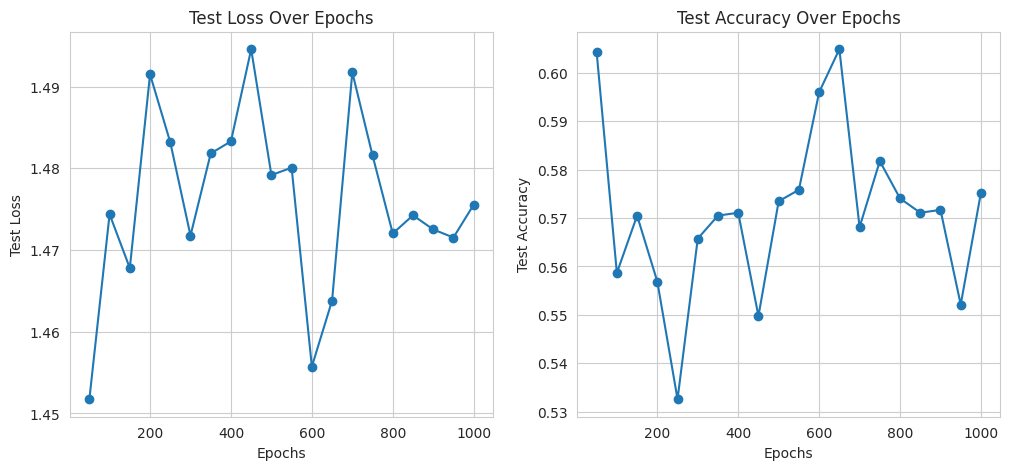

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Initialize the model and optimizer
num_features = features.size(1)
num_classes = int(labels.max()) + 1
hidden_channels = 64  # You can adjust this as needed
model = GCN(num_features, hidden_channels, num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define a function for evaluation
import torch

import torch
import numpy as np

def evaluate(model, features, adj, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(features, adj.t())
        logits = logits[mask].cpu().numpy()  # Move logits to CPU and convert to numpy
        labels = labels[mask].cpu().numpy()  # Move labels to CPU and convert to numpy
        pred = np.argmax(logits, axis=1)  # Convert logits to predicted class indices
        accuracy = accuracy_score(labels, pred)
        precision = precision_score(labels, pred, average='micro')
        recall = recall_score(labels, pred, average='micro')
        return accuracy, precision, recall




# Training loop
num_epochs = 1000
train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
model=model.cuda()
best_test_accuracy = 0.0
best_model_state = None

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()
    logits = model(features, adj.t())
    loss = F.cross_entropy(logits[idx_train], labels[idx_train])
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        train_loss = loss.item()
        val_loss = F.cross_entropy(logits[idx_val], labels[idx_val]).item()
        test_loss = F.cross_entropy(logits[idx_test], labels[idx_test]).item()

        train_accuracy, train_precision, train_recall = evaluate(model, features,adj,labels, idx_train)
        val_accuracy, val_precision, val_recall = evaluate(model, features,adj,labels, idx_val)
        test_accuracy, test_precision, test_recall = evaluate(model, features,adj,labels, idx_test)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch}/{num_epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}")
        print("")

        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model_state = model.state_dict()

# Load the best model state
model.load_state_dict(best_model_state)


# Plot test loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(50, num_epochs + 1, 50), test_losses, marker='o')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.subplot(1, 2, 2)
plt.plot(range(50, num_epochs + 1, 50), test_accuracies, marker='o')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.show()


#sdfgh



```

Epoch 50/1000:
Train Loss: 1.1280, Train Accuracy: 0.9143, Train Precision: 0.9143, Train Recall: 0.9143
Validation Loss: 1.4380, Validation Accuracy: 0.6303, Validation Precision: 0.6303, Validation Recall: 0.6303
Test Loss: 1.4256, Test Accuracy: 0.6363, Test Precision: 0.6363, Test Recall: 0.6363

Epoch 100/1000:
Train Loss: 1.0916, Train Accuracy: 0.9524, Train Precision: 0.9524, Train Recall: 0.9524
Validation Loss: 1.4732, Validation Accuracy: 0.5592, Validation Precision: 0.5592, Validation Recall: 0.5592
Test Loss: 1.4640, Test Accuracy: 0.5569, Test Precision: 0.5569, Test Recall: 0.5569

Epoch 150/1000:
Train Loss: 1.0870, Train Accuracy: 0.9571, Train Precision: 0.9571, Train Recall: 0.9571
Validation Loss: 1.4370, Validation Accuracy: 0.5972, Validation Precision: 0.5972, Validation Recall: 0.5972
Test Loss: 1.4378, Test Accuracy: 0.6126, Test Precision: 0.6126, Test Recall: 0.6126

Epoch 200/1000:
Train Loss: 1.0864, Train Accuracy: 0.9571, Train Precision: 0.9571, Train Recall: 0.9571
Validation Loss: 1.4619, Validation Accuracy: 0.5924, Validation Precision: 0.5924, Validation Recall: 0.5924
Test Loss: 1.4578, Test Accuracy: 0.5853, Test Precision: 0.5853, Test Recall: 0.5853

Epoch 250/1000:
Train Loss: 1.0758, Train Accuracy: 0.9619, Train Precision: 0.9619, Train Recall: 0.9619
Validation Loss: 1.4728, Validation Accuracy: 0.5687, Validation Precision: 0.5687, Validation Recall: 0.5687
Test Loss: 1.4290, Test Accuracy: 0.6013, Test Precision: 0.6013, Test Recall: 0.6013

Epoch 300/1000:
Train Loss: 1.0713, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.4690, Validation Accuracy: 0.5640, Validation Precision: 0.5640, Validation Recall: 0.5640
Test Loss: 1.4604, Test Accuracy: 0.5889, Test Precision: 0.5889, Test Recall: 0.5889

Epoch 350/1000:
Train Loss: 1.0683, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.4785, Validation Accuracy: 0.5829, Validation Precision: 0.5829, Validation Recall: 0.5829
Test Loss: 1.4622, Test Accuracy: 0.5936, Test Precision: 0.5936, Test Recall: 0.5936

Epoch 400/1000:
Train Loss: 1.0674, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.4895, Validation Accuracy: 0.5640, Validation Precision: 0.5640, Validation Recall: 0.5640
Test Loss: 1.4564, Test Accuracy: 0.6007, Test Precision: 0.6007, Test Recall: 0.6007

Epoch 450/1000:
Train Loss: 1.0683, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.5088, Validation Accuracy: 0.5261, Validation Precision: 0.5261, Validation Recall: 0.5261
Test Loss: 1.4735, Test Accuracy: 0.5741, Test Precision: 0.5741, Test Recall: 0.5741

Epoch 500/1000:
Train Loss: 1.0679, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.4693, Validation Accuracy: 0.5735, Validation Precision: 0.5735, Validation Recall: 0.5735
Test Loss: 1.4536, Test Accuracy: 0.5889, Test Precision: 0.5889, Test Recall: 0.5889

Epoch 550/1000:
Train Loss: 1.0676, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4594, Validation Accuracy: 0.5592, Validation Precision: 0.5592, Validation Recall: 0.5592
Test Loss: 1.4626, Test Accuracy: 0.5841, Test Precision: 0.5841, Test Recall: 0.5841

Epoch 600/1000:
Train Loss: 1.0672, Train Accuracy: 0.9762, Train Precision: 0.9762, Train Recall: 0.9762
Validation Loss: 1.4530, Validation Accuracy: 0.5877, Validation Precision: 0.5877, Validation Recall: 0.5877
Test Loss: 1.4421, Test Accuracy: 0.6019, Test Precision: 0.6019, Test Recall: 0.6019

Epoch 650/1000:
Train Loss: 1.0630, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4636, Validation Accuracy: 0.5735, Validation Precision: 0.5735, Validation Recall: 0.5735
Test Loss: 1.4524, Test Accuracy: 0.5954, Test Precision: 0.5954, Test Recall: 0.5954

Epoch 700/1000:
Train Loss: 1.0626, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4288, Validation Accuracy: 0.5924, Validation Precision: 0.5924, Validation Recall: 0.5924
Test Loss: 1.4513, Test Accuracy: 0.5948, Test Precision: 0.5948, Test Recall: 0.5948

Epoch 750/1000:
Train Loss: 1.0626, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4883, Validation Accuracy: 0.5687, Validation Precision: 0.5687, Validation Recall: 0.5687
Test Loss: 1.4594, Test Accuracy: 0.5918, Test Precision: 0.5918, Test Recall: 0.5918

Epoch 800/1000:
Train Loss: 1.0627, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4368, Validation Accuracy: 0.5877, Validation Precision: 0.5877, Validation Recall: 0.5877
Test Loss: 1.4400, Test Accuracy: 0.6078, Test Precision: 0.6078, Test Recall: 0.6078

Epoch 850/1000:
Train Loss: 1.0627, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4416, Validation Accuracy: 0.5877, Validation Precision: 0.5877, Validation Recall: 0.5877
Test Loss: 1.4513, Test Accuracy: 0.5972, Test Precision: 0.5972, Test Recall: 0.5972

Epoch 900/1000:
Train Loss: 1.0635, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4743, Validation Accuracy: 0.5972, Validation Precision: 0.5972, Validation Recall: 0.5972
Test Loss: 1.4804, Test Accuracy: 0.5829, Test Precision: 0.5829, Test Recall: 0.5829

Epoch 950/1000:
Train Loss: 1.0627, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4344, Validation Accuracy: 0.5924, Validation Precision: 0.5924, Validation Recall: 0.5924
Test Loss: 1.4658, Test Accuracy: 0.5752, Test Precision: 0.5752, Test Recall: 0.5752

Epoch 1000/1000:
Train Loss: 1.0627, Train Accuracy: 0.9810, Train Precision: 0.9810, Train Recall: 0.9810
Validation Loss: 1.4348, Validation Accuracy: 0.5924, Validation Precision: 0.5924, Validation Recall: 0.5924
Test Loss: 1.4754, Test Accuracy: 0.5717, Test Precision: 0.5717, Test Recall: 0.5717
```

